In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

warnings.simplefilter('ignore')

C:\Users\Shridatta\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('all_seasons.csv')
df.head()

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 22 columns]

In [3]:
df.shape

(12844, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
df.drop(columns='Unnamed: 0',inplace = True)

In [6]:
df.describe().round().T

count   mean   std    min    25%    50%    75%    max
age            12844.0   27.0   4.0   18.0   24.0   26.0   30.0   44.0
player_height  12844.0  201.0   9.0  160.0  193.0  201.0  208.0  231.0
player_weight  12844.0  100.0  12.0   60.0   91.0  100.0  109.0  163.0
gp             12844.0   51.0  25.0    1.0   31.0   57.0   73.0   85.0
pts            12844.0    8.0   6.0    0.0    4.0    7.0   12.0   36.0
reb            12844.0    4.0   2.0    0.0    2.0    3.0    5.0   16.0
ast            12844.0    2.0   2.0    0.0    1.0    1.0    2.0   12.0
net_rating     12844.0   -2.0  13.0 -250.0   -6.0   -1.0    3.0  300.0
oreb_pct       12844.0    0.0   0.0    0.0    0.0    0.0    0.0    1.0
dreb_pct       12844.0    0.0   0.0    0.0    0.0    0.0    0.0    1.0
usg_pct        12844.0    0.0   0.0    0.0    0.0    0.0    0.0    1.0
ts_pct         12844.0    1.0   0.0    0.0    0.0    1.0    1.0    2.0
ast_pct        12844.0    0.0   0.0    0.0    0.0    0.0    0.0    1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            12844 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [8]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [9]:
df.duplicated().sum()

0

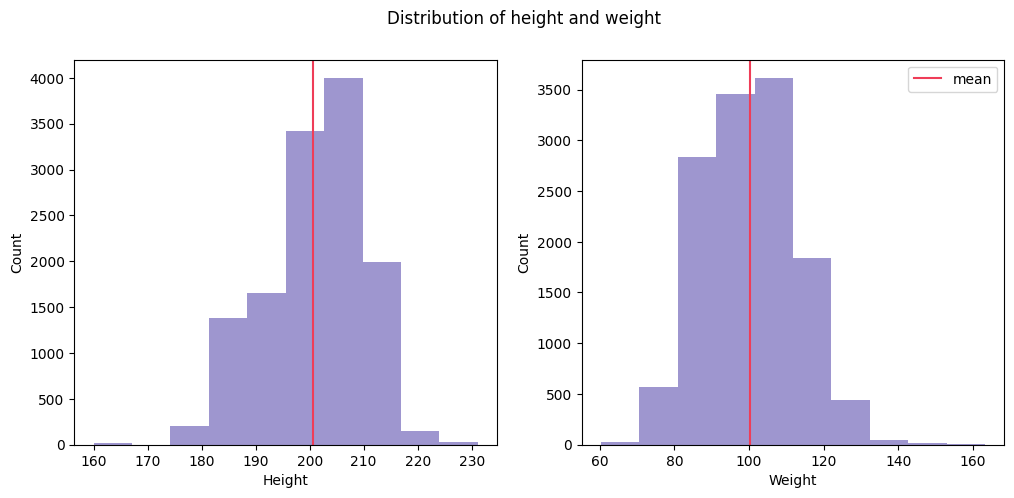

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

plt.suptitle("Distribution of height and weight")

# first plot
ax1.hist(df["player_height"],color='#9E96CF')
ax1.axvline(df["player_height"].mean(),color='#EF3D58',label="mean")
ax1.set_xlabel("Height")
ax1.set_ylabel("Count")

#second plot
ax2.hist(df["player_weight"],color='#9E96CF')
ax2.axvline(df["player_weight"].mean(),color='#EF3D58',label="mean")
ax2.set_xlabel("Weight")
ax2.set_ylabel("Count")

plt.legend()
plt.show()

In [11]:
data = go.Scatter(
    x=df['player_height'],
    y=df['player_weight'],
    mode='markers',
    marker=dict(color='#4A4C76')
)
layout = go.Layout(height=750,
                   width=950,
                   title={
                       'text': "Height vs Weight",
                       'x': 0.4,
                       'y': 0.93,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   },
                   xaxis={'title': 'Height'},
                   yaxis=dict(title='Weight'),
                   template='plotly_white')
fig = go.Figure(data = data , layout = layout)
fig.show()

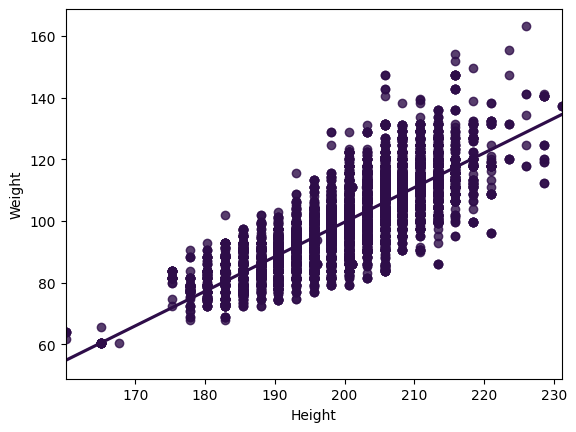

In [12]:
sns.regplot(data=df,x='player_height',y='player_weight',color='#2E0D49')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

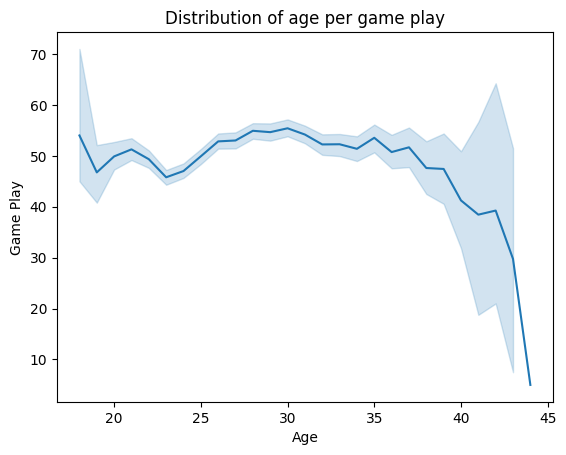

In [13]:
sns.lineplot(data=df,x='age',y='gp')
plt.title("Distribution of age per game play")
plt.xlabel("Age")
plt.ylabel("Game Play")
plt.show()

In [14]:
season_group = df.groupby(df['season']).agg({'age':'mean','player_height':'mean','player_weight':'mean'})
season_group.reset_index(inplace=True)

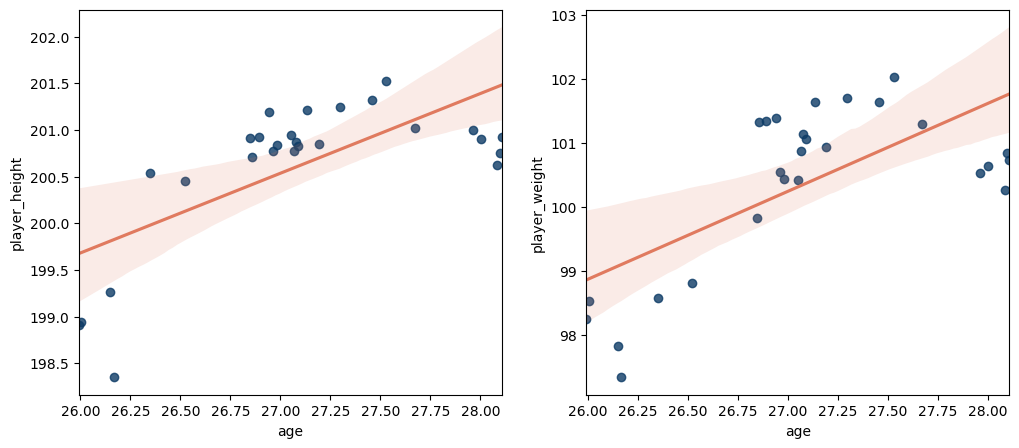

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.axes_style()
sns.regplot(data=season_group,x='age',y='player_height',line_kws={'color':'#e07a5f'},color='#0d3b66',ax=ax[0])
sns.regplot(data=season_group,x='age',y='player_weight',line_kws={'color':'#e07a5f'},color='#0d3b66',ax=ax[1])    
plt.show()

In [16]:
season_group.head(5)

season        age  player_height  player_weight
0  1996-97  27.963719     200.994830     100.526270
1  1997-98  28.084282     200.619499     100.265530
2  1998-99  28.002278     200.903007     100.639563
3  1999-00  28.107306     200.920959     100.735741
4  2000-01  28.097506     200.752154     100.842450

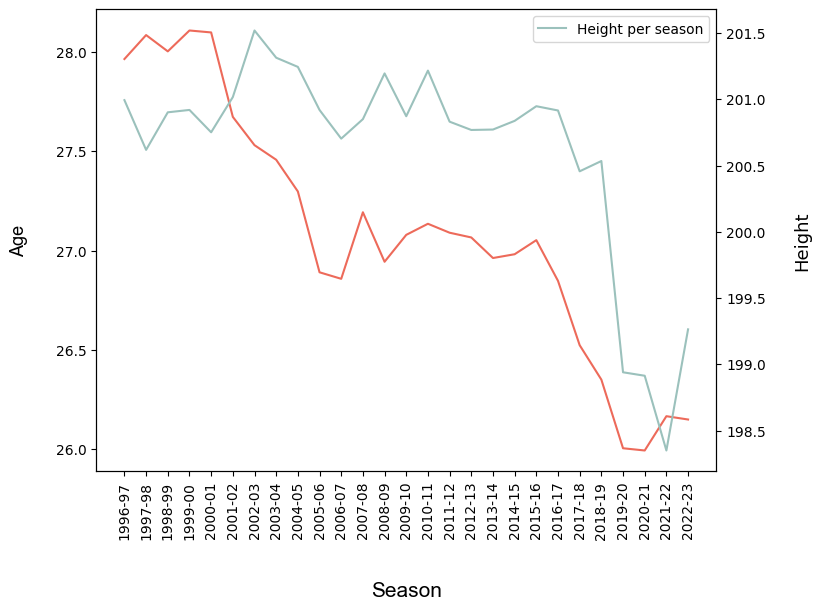

In [17]:
fig,ax = plt.subplots(figsize=(8, 6))

# first plot
ax.plot(season_group['season'],season_group['age'],color='#ed6a5a')
ax.set_xlabel('Season',labelpad=30,fontsize=15,fontname='Arial')
ax.set_ylabel('Age',labelpad=20,fontsize=13,fontname='Arial')

# second
ax_right = plt.twinx()
ax_right.plot(season_group['season'],season_group['player_height'], color='#9bc1bc',label='Height per season')
ax_right.set_ylabel('Height',fontsize=13,labelpad=20)
ax_right.legend()

ax.set_xticklabels(season_group['season'],rotation='vertical')
plt.show()

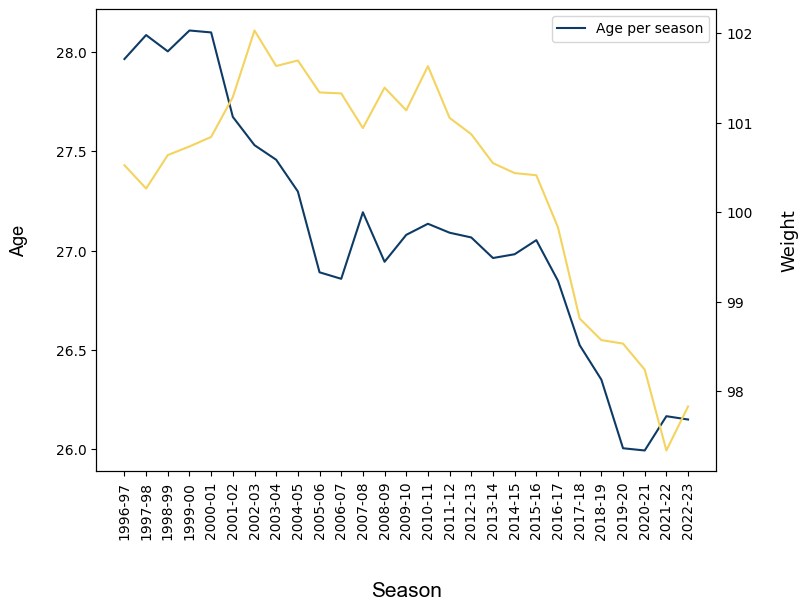

In [18]:
fig,ax = plt.subplots(figsize =(8, 6))

# first plot
ax.plot(season_group['season'],season_group['age'],color='#0d3b66',label='Age per season')
ax.set_xlabel('Season',labelpad=30,fontsize=15,fontname='Arial')
ax.set_ylabel('Age',labelpad=20,fontsize=13,fontname='Arial')
ax.legend()

# second
ax_right = plt.twinx()
ax_right.plot(season_group['season'],season_group['player_weight'], color='#f4d35e')
ax_right.set_ylabel('Weight',fontsize=13,labelpad=20)


ax.set_xticklabels(season_group['season'],rotation='vertical')
plt.show()

In [19]:
teamGroup = df.groupby("team_abbreviation").aggregate({'age':'mean','player_height':'mean','player_weight':'mean'})
teamGroup.reset_index(inplace = True)

In [20]:
teamGroup.head(5)

team_abbreviation        age  player_height  player_weight
0               ATL  26.712984     200.856720     100.572402
1               BKN  27.155000     200.037700      99.636019
2               BOS  26.632941     199.996612     101.238533
3               CHA  26.045902     200.140066      99.567915
4               CHH  29.056180     200.916854     102.037814

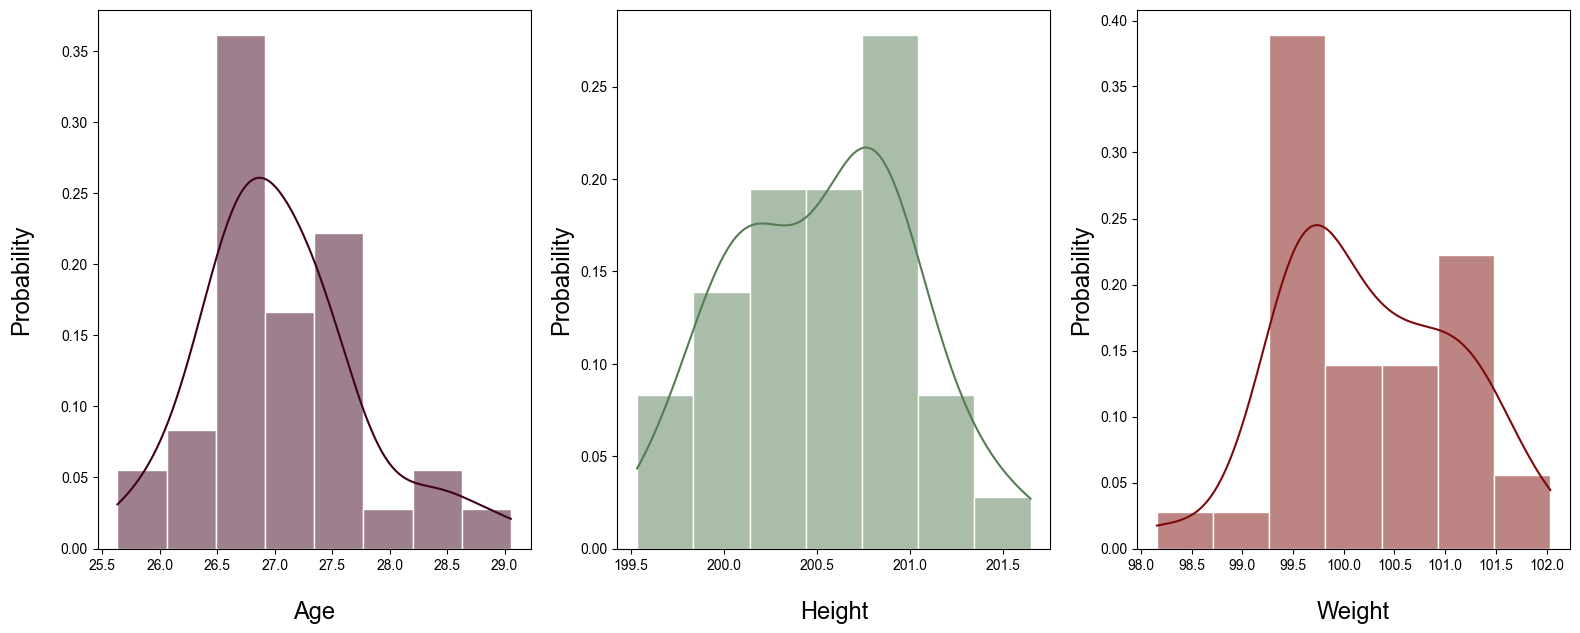

In [21]:
fig , (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(19,7))

sns.axes_style()

sns.set_theme(style='white')

# first
sns.histplot(teamGroup,x='age',kde=True,stat="probability",ax=ax1,color='#3E001F')
ax1.set_xlabel('Age',fontsize=17,labelpad=20)
ax1.set_ylabel('Probability',fontsize=17,labelpad=20)


#second
sns.histplot(teamGroup,x='player_height',stat="probability",kde=True,ax=ax2,color='#557C55')
ax2.set_xlabel('Height',fontsize=17,labelpad=20)
ax2.set_ylabel('Probability',fontsize=17,labelpad=5)


#third
sns.histplot(teamGroup,x='player_weight',stat="probability",kde=True,ax=ax3,color='#7D0A0A')
ax3.set_xlabel('Weight',fontsize=17,labelpad=20)
ax3.set_ylabel('Probability',fontsize=17,labelpad=5)



plt.show()

In [22]:
df.corr()

age  player_height  player_weight        gp       pts  \
age            1.000000      -0.007904       0.063561  0.057442  0.011353   
player_height -0.007904       1.000000       0.822141  0.004963 -0.055284   
player_weight  0.063561       0.822141       1.000000  0.022828 -0.025023   
gp             0.057442       0.004963       0.022828  1.000000  0.536003   
pts            0.011353      -0.055284      -0.025023  0.536003  1.000000   
reb            0.037386       0.424220       0.438112  0.471405  0.624509   
ast            0.092359      -0.442781      -0.371675  0.382726  0.664320   
net_rating     0.092896      -0.003074       0.003547  0.248412  0.215199   
oreb_pct      -0.055228       0.589538       0.599511 -0.014763 -0.125164   
dreb_pct       0.018774       0.614273       0.605639  0.067911  0.055669   
usg_pct       -0.113882      -0.104011      -0.065811  0.147248  0.641469   
ts_pct         0.025245       0.076797       0.070992  0.367876  0.373439   
ast_pct        0.069029      -0.608696      -0.521939  0.131720  0.337339   

                    reb       ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
age            0.037386  0.092359    0.092896 -0.055228  0.018774 -0.113882   
player_height  0.424220 -0.442781   -0.003074  0.589538  0.614273 -0.104011   
player_weight  0.438112 -0.371675    0.003547  0.599511  0.605639 -0.065811   
gp             0.471405  0.382726    0.248412 -0.014763  0.067911  0.147248   
pts            0.624509  0.664320    0.215199 -0.125164  0.055669  0.641469   
reb            1.000000  0.247841    0.187820  0.407960  0.611899  0.232968   
ast            0.247841  1.000000    0.162865 -0.337970 -0.192146  0.396505   
net_rating     0.187820  0.162865    1.000000  0.055761  0.047928  0.026575   
oreb_pct       0.407960 -0.337970    0.055761  1.000000  0.555358 -0.100091   
dreb_pct       0.611899 -0.192146    0.047928  0.555358  1.000000 -0.007402   
usg_pct        0.232968  0.396505    0.026575 -0.100091 -0.007402  1.000000   
ts_pct         0.313451  0.174494    0.313251  0.060572  0.105150  0.119323   
ast_pct       -0.062654  0.803150    0.063809 -0.424056 -0.317477  0.339286   

                 ts_pct   ast_pct  
age            0.025245  0.069029  
player_height  0.076797 -0.608696  
player_weight  0.070992 -0.521939  
gp             0.367876  0.131720  
pts            0.373439  0.337339  
reb            0.313451 -0.062654  
ast            0.174494  0.803150  
net_rating     0.313251  0.063809  
oreb_pct       0.060572 -0.424056  
dreb_pct       0.105150 -0.317477  
usg_pct        0.119323  0.339286  
ts_pct         1.000000  0.022195  
ast_pct        0.022195  1.000000

<AxesSubplot: >

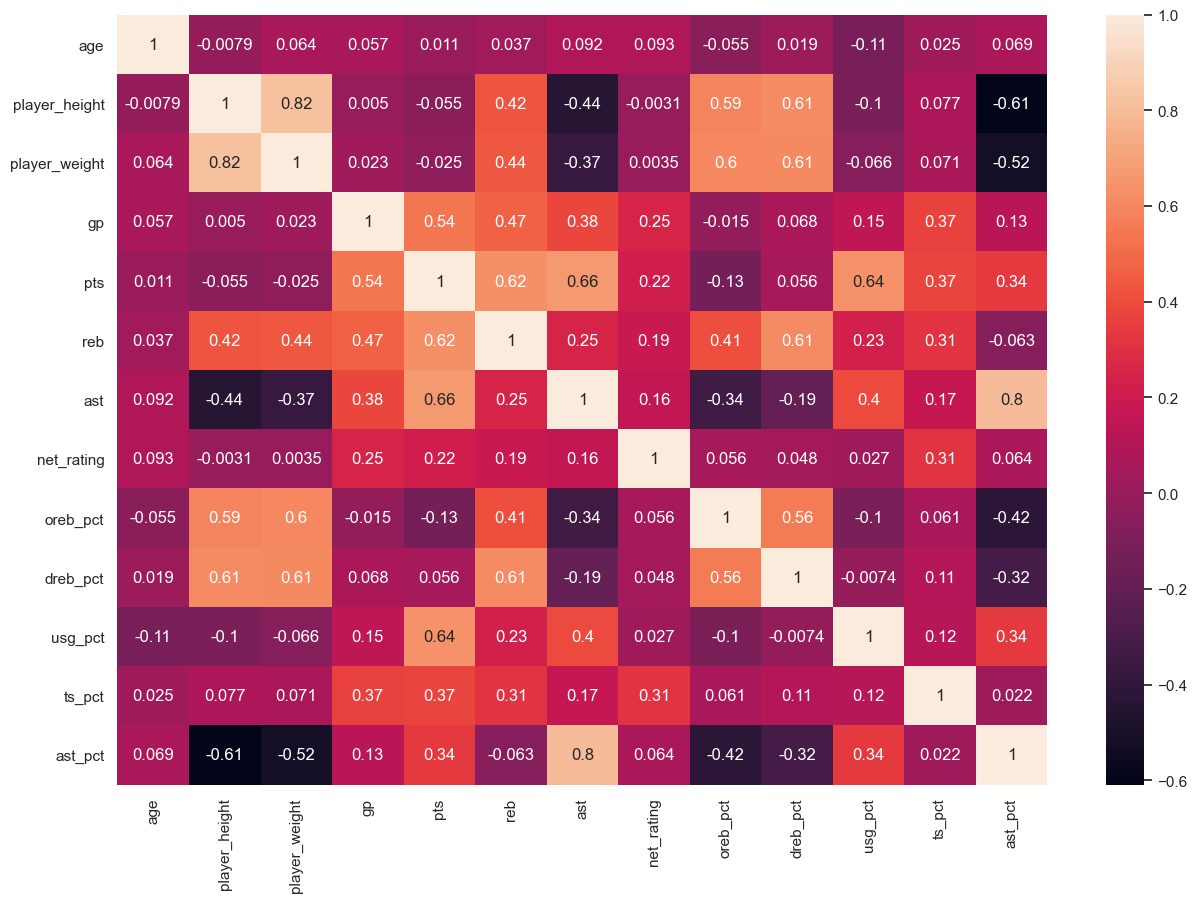

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

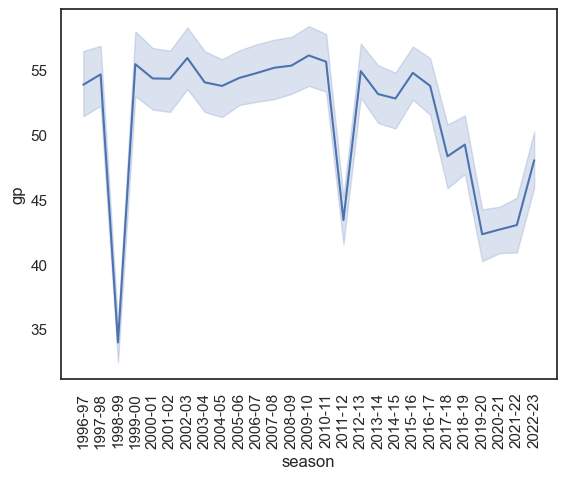

In [24]:
plot=sns.lineplot(data=df,  x="season", y="gp")
plt.setp(plot.get_xticklabels(), rotation=90);

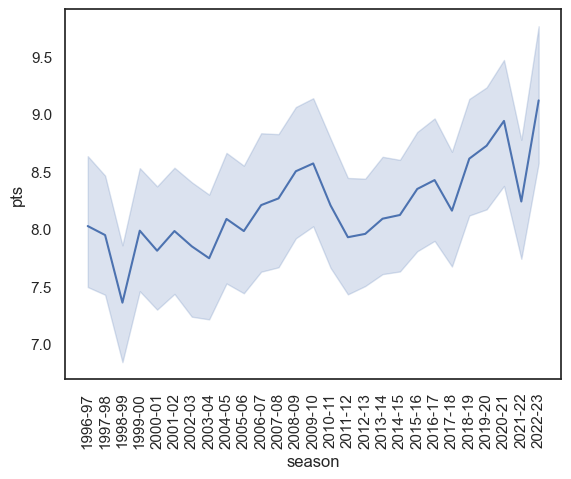

In [25]:
plot=sns.lineplot(data=df,  x="season", y="pts")
plt.setp(plot.get_xticklabels(), rotation=90);

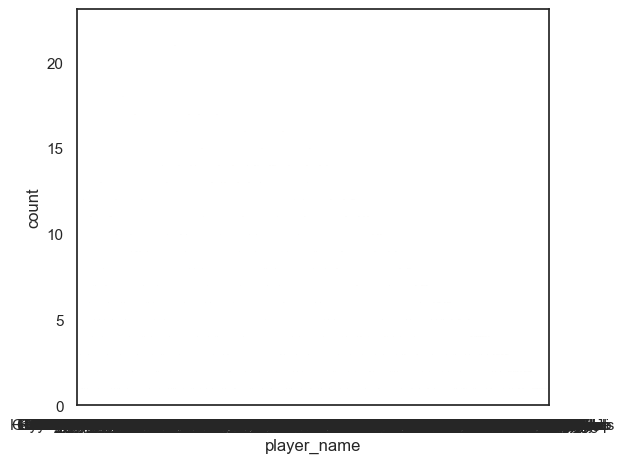

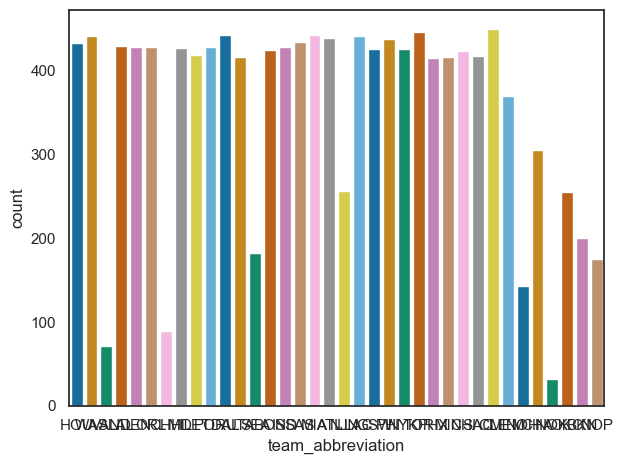

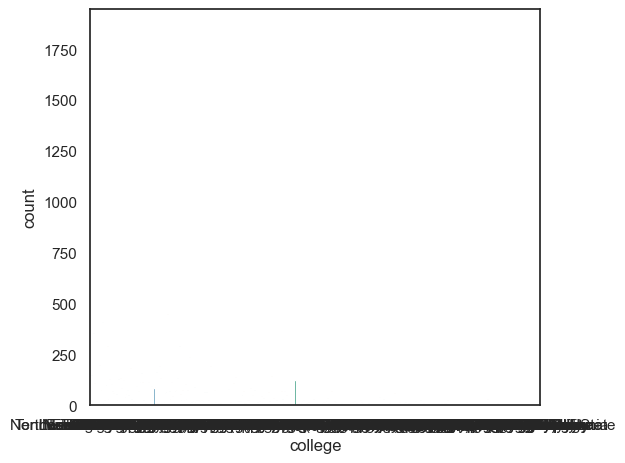

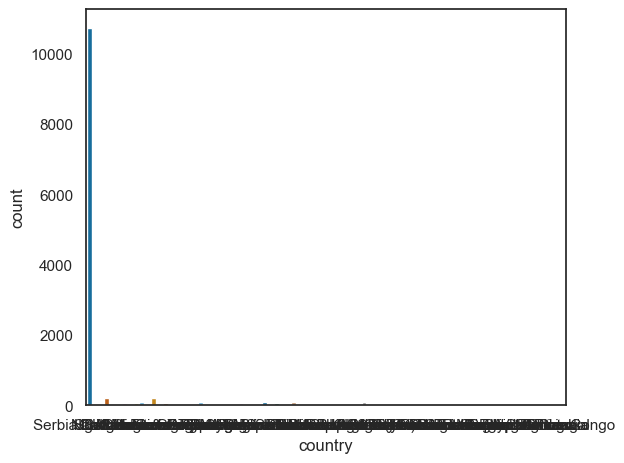

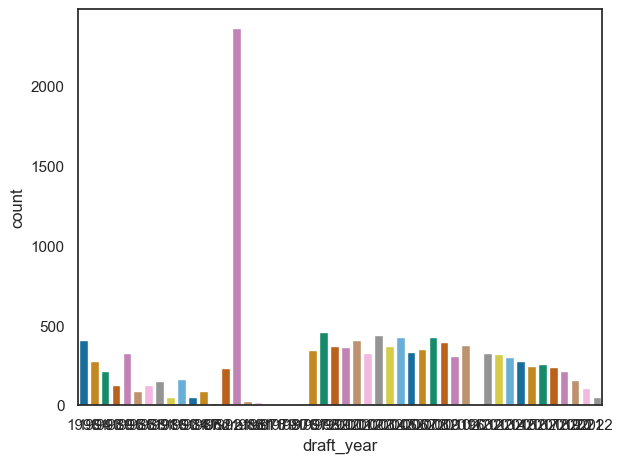

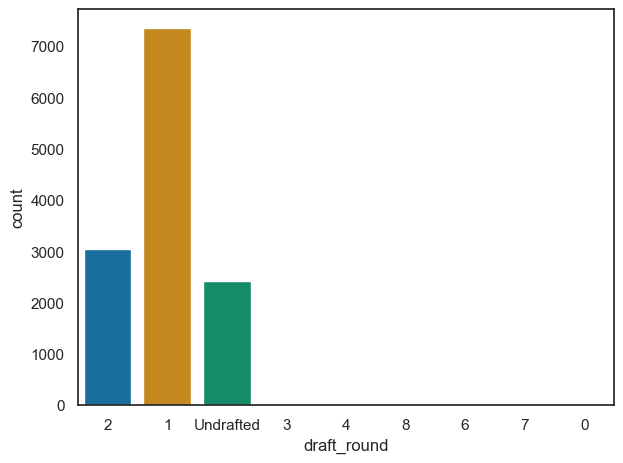

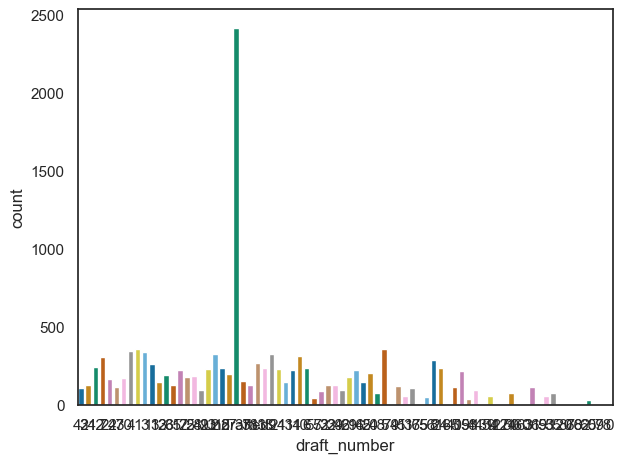

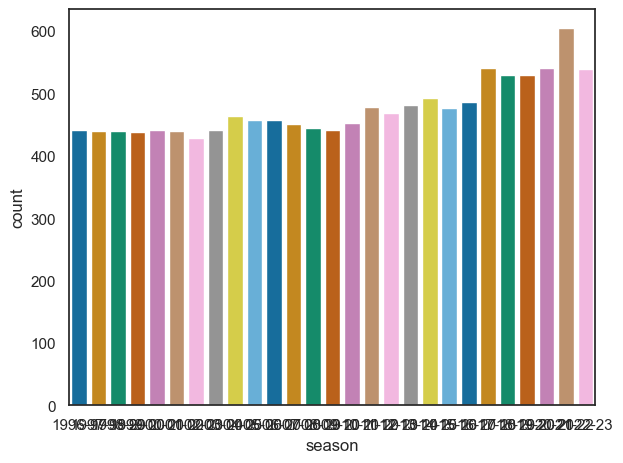

In [26]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette="colorblind")
    plt.tight_layout()
    plt.show()

In [27]:
df['pts'] = (df['gp']*df['pts']).astype(int)
df['reb'] = (df['gp']*df['reb']).astype(int)
df['ast'] = (df['gp']*df['ast']).astype(int)
df.head()

player_name team_abbreviation   age  player_height  player_weight  \
0  Randy Livingston               HOU  22.0         193.04      94.800728   
1  Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2      George Lynch               VAN  26.0         203.20     103.418976   
3    George McCloud               LAL  30.0         203.20     102.058200   
4      George Zidek               DEN  23.0         213.36     119.748288   

                 college country draft_year draft_round draft_number  ...  \
0        Louisiana State     USA       1996           2           42  ...   
1  Northwestern Oklahoma     USA       1994           2           34  ...   
2         North Carolina     USA       1993           1           12  ...   
3          Florida State     USA       1989           1            7  ...   
4                   UCLA     USA       1995           1           22  ...   

   pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0  249   96  153         0.3     0.042     0.071    0.169   0.487    0.248   
1   15    5    1         8.9     0.030     0.111    0.174   0.497    0.043   
2  340  262   77        -8.2     0.106     0.185    0.175   0.512    0.125   
3  652  179  108        -2.7     0.027     0.111    0.206   0.527    0.125   
4  145   88   15       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 21 columns]

In [47]:
df['total_pts'] = df.groupby('player_name')['pts'].cumsum()
df['total_reb'] = df.groupby('player_name')['reb'].cumsum()
df['total_ast'] = df.groupby('player_name')['ast'].cumsum()
df[df['player_name']=='Kobe Bryant'].head()

player_name team_abbreviation   age  player_height  player_weight  \
334   Kobe Bryant               LAL  18.0         200.66       90.71840   
496   Kobe Bryant               LAL  19.0         200.66       95.25432   
1225  Kobe Bryant               LAL  20.0         200.66       97.52228   
1413  Kobe Bryant               LAL  21.0         200.66       95.25432   
1882  Kobe Bryant               LAL  22.0         200.66       95.25432   

     college country draft_year draft_round draft_number  ...  ts_pct  \
334     None     USA       1996           1           13  ...   0.544   
496     None     USA       1996           1           13  ...   0.548   
1225    None     USA       1996           1           13  ...   0.549   
1413    None     USA       1996           1           13  ...   0.546   
1882    None     USA       1996           1           13  ...   0.552   

      ast_pct   season  total_pts  total_reb  total_ast   rank  prev pts  \
334     0.144  1996-97        539        134         92  131.0       NaN   
496     0.165  1997-98       1755        378        289   42.0     539.0   
1225    0.176  1998-99       2749        643        479   11.0    1216.0   
1413    0.215  1999-00       4234       1058        802    NaN     994.0   
1882    0.220  2000-01       6172       1459       1142    NaN    1485.0   

      prev gp   diff  
334       NaN    NaN  
496      71.0  677.0  
1225     79.0 -222.0  
1413     50.0  491.0  
1882     66.0  453.0  

[5 rows x 28 columns]

In [62]:
df[df['player_name']=='LeBron James']

player_name team_abbreviation   age  player_height  player_weight  \
3448   LeBron James               CLE  19.0         203.20      108.86208   
3616   LeBron James               CLE  20.0         203.20      108.86208   
4103   LeBron James               CLE  21.0         203.20      108.86208   
4807   LeBron James               CLE  22.0         203.20      108.86208   
5133   LeBron James               CLE  23.0         203.20      113.39800   
5387   LeBron James               CLE  24.0         203.20      113.39800   
6099   LeBron James               CLE  25.0         203.20      113.39800   
6585   LeBron James               MIA  26.0         203.20      113.39800   
6746   LeBron James               MIA  27.0         203.20      113.39800   
7585   LeBron James               MIA  28.0         203.20      113.39800   
7977   LeBron James               MIA  29.0         203.20      113.39800   
8190   LeBron James               CLE  30.0         203.20      113.39800   
8979   LeBron James               CLE  31.0         203.20      113.39800   
9176   LeBron James               CLE  32.0         203.20      113.39800   
9671   LeBron James               CLE  33.0         203.20      113.39800   
10565  LeBron James               LAL  34.0         203.20      113.39800   
10958  LeBron James               LAL  35.0         205.74      113.39800   
11595  LeBron James               LAL  36.0         205.74      113.39800   
12108  LeBron James               LAL  37.0         205.74      113.39800   
12733  LeBron James               LAL  38.0         205.74      113.39800   

      college country draft_year draft_round draft_number  ...  ts_pct  \
3448     None     USA       2003           1            1  ...   0.488   
3616     None     USA       2003           1            1  ...   0.554   
4103     None     USA       2003           1            1  ...   0.568   
4807     None     USA       2003           1            1  ...   0.552   
5133     None     USA       2003           1            1  ...   0.568   
5387     None     USA       2003           1            1  ...   0.591   
6099     None     USA       2003           1            1  ...   0.604   
6585     None     USA       2003           1            1  ...   0.594   
6746     None     USA       2003           1            1  ...   0.605   
7585     None     USA       2003           1            1  ...   0.640   
7977     None     USA       2003           1            1  ...   0.649   
8190     None     USA       2003           1            1  ...   0.577   
8979     None     USA       2003           1            1  ...   0.588   
9176     None     USA       2003           1            1  ...   0.619   
9671     None     USA       2003           1            1  ...   0.621   
10565    None     USA       2003           1            1  ...   0.588   
10958    None     USA       2003           1            1  ...   0.577   
11595    None     USA       2003           1            1  ...   0.602   
12108    None     USA       2003           1            1  ...   0.619   
12733    None     USA       2003           1            1  ...   0.583   

       ast_pct   season  total_pts  total_reb  total_ast  rank  prev pts  \
3448     0.268  2003-04       1651        434        466   7.0       NaN   
3616     0.324  2004-05       3827       1026       1042   2.0    1651.0   
4103     0.315  2005-06       6307       1579       1563   2.0    2176.0   
4807     0.281  2006-07       8436       2101       2031   2.0    2480.0   
5133     0.352  2007-08      10686       2693       2571   2.0    2129.0   
5387     0.365  2008-09      12986       3308       3154   2.0    2250.0   
6099     0.398  2009-10      15243       3862       3807   2.0    2300.0   
6585     0.343  2010-11      17352       4454       4360   2.0    2257.0   
6746     0.318  2011-12      19032       4943       4744   NaN    2109.0   
7585     0.344  2012-13      21068       5551       5298   3.0    1680.0   

In [29]:
df.groupby('player_name')['gp'].sum()

player_name
A.C. Green            379
A.J. Bramlett           8
A.J. Guyton            80
A.J. Lawson            15
AJ Green               35
                     ... 
Zion Williamson       114
Zoran Dragic           16
Zoran Planinic        148
Zydrunas Ilgauskas    843
Zylan Cheatham          5
Name: gp, Length: 2551, dtype: int64

In [58]:
df[df['player_name']=='LeBron James']['gp'].sum()

1421

In [64]:
df[df['player_name']=='LeBron James']['pts'].sum()/df[df['player_name']=='LeBron James']['gp'].sum()

27.192821956368753

In [68]:
(df['pts'].groupby(df['player_name']).sum()/df['gp'].groupby(df['player_name']).sum()).sort_values(ascending=False).head(15)

player_name
Luka Doncic         27.557576
Kevin Durant        27.267748
Joel Embiid         27.203046
LeBron James        27.192822
Allen Iverson       26.669584
Zion Williamson     25.798246
Michael Jordan      25.470588
Trae Young          25.456091
Damian Lillard      25.205462
Kobe Bryant         24.982169
James Harden        24.686000
Stephen Curry       24.628118
Donovan Mitchell    24.612591
Anthony Davis       23.992424
Devin Booker        23.941509
dtype: float64

In [30]:
all_points = round((((df["gp"]*df["pts"]).groupby(df["player_name"]).sum())/
 (df["gp"].groupby(df["player_name"]).sum())),1).sort_values(ascending=False)

all_games = (df["gp"]).groupby(df["player_name"]).sum().sort_values(ascending=False)

points_games = pd.concat([all_points.rename("Average Points"),all_games.rename("Games Played")],axis=1)

In [31]:
points_games[points_games["Games Played"]>=500].head(10)

Average Points  Games Played
player_name                                     
LeBron James                1973.7          1421
Kevin Durant                1911.3           986
Allen Iverson               1852.9           914
Kobe Bryant                 1828.4          1346
Damian Lillard              1817.9           769
James Harden                1809.1          1000
Karl Malone                 1806.0           578
Stephen Curry               1734.4           882
Russell Westbrook           1655.2          1094
Karl-Anthony Towns          1616.7           511

In [32]:
df["rank"] = df[(df["season"]=="1998-99") & (df["gp"]>=40) | (df["gp"]>=70)].groupby("season")["pts"].rank(method="first",ascending=False)
df[["player_name","season","pts","rank","gp"]][df["rank"]<=3].sort_values(by=["season","rank"]).head(12).reset_index(drop=True)

player_name   season   pts  rank  gp
0     Michael Jordan  1996-97  2427   1.0  82
1        Karl Malone  1996-97  2246   2.0  82
2          Glen Rice  1996-97  2117   3.0  79
3     Michael Jordan  1997-98  2353   1.0  82
4        Karl Malone  1997-98  2187   2.0  81
5     Antoine Walker  1997-98  1836   3.0  82
6   Shaquille O'Neal  1998-99  1288   1.0  49
7      Allen Iverson  1998-99  1286   2.0  48
8        Karl Malone  1998-99  1166   3.0  49
9   Shaquille O'Neal  1999-00  2346   1.0  79
10      Vince Carter  1999-00  2107   2.0  82
11       Karl Malone  1999-00  2091   3.0  82

In [33]:
player_table = df[["player_name", "team_abbreviation", "season"]].drop_duplicates()
team_points = df.groupby(["team_abbreviation", "season"]).apply(lambda x: np.sum(x.pts * x.gp)).rename("pts").reset_index()
df2 = player_table.merge(team_points, on=["team_abbreviation", "season"])
final = round(df2.groupby("player_name")["pts"].sum()).astype(int).sort_values(ascending=False)
# Note that, unlike SQLite, Pandas does NOT round 0.5 up to 1, hence the different(60841,60840)Team Points values for Malone.

player_points = round(((df["gp"]*df["pts"]).groupby(df["player_name"]).sum())).astype(int)
points_players_teams = pd.concat([player_points.rename("Player Points"),final.rename("Team Points")],axis=1)
points_players_teams["Percentage"] = round((points_players_teams["Player Points"]/points_players_teams["Team Points"])*100,1)
points_players_teams = points_players_teams.sort_values(by="Percentage",ascending=False)
points_players_teams["Percentage"] = points_players_teams["Percentage"].astype(str) + " %"
points_players_teams[points_players_teams["Team Points"]>30000].head(10)

Player Points  Team Points Percentage
player_name                                           
Michael Jordan          608880      2184418     27.9 %
LeBron James           2804557     11818648     23.7 %
Karl Malone            1043850      4461068     23.4 %
Allen Iverson          1693506      7428446     22.8 %
Trae Young              635810      2802713     22.7 %
Luka Doncic             598734      2739901     21.9 %
Kobe Bryant            2460983     11301133     21.8 %
James Harden           1809132      8428900     21.5 %
Damian Lillard         1397951      6495749     21.5 %
Anthony Edwards         363881      1705242     21.3 %

In [34]:
df["prev pts"] = df.groupby("player_name")["pts"].shift(1)
df["prev gp"] = df.groupby("player_name")["gp"].shift(1)
df["diff"] = df["pts"] - df["prev pts"]
df[["player_name","team_abbreviation","pts","prev pts","diff","gp","season"]][(df["gp"]>=60) & (df["prev gp"]>=60) & 
(df["prev pts"]>=10)].sort_values(by="diff",ascending=False).reset_index(drop=True).head(15)

player_name team_abbreviation   pts  prev pts    diff  gp   season
0       CJ McCollum               POR  1664     421.0  1243.0  80  2015-16
1       Kobe Bryant               LAL  2832    1821.0  1011.0  80  2005-06
2     Zach Randolph               POR  1628     646.0   982.0  81  2003-04
3      James Harden               HOU  2020    1041.0   979.0  78  2012-13
4       Jason Terry               ATL  1615     656.0   959.0  82  2000-01
5      Gerald Green               PHX  1295     420.0   875.0  82  2013-14
6       Dwyane Wade               MIA  1855     988.0   867.0  77  2004-05
7     Tracy McGrady               ORL  2063    1216.0   847.0  77  2000-01
8      Kevin Martin               SAC  1616     777.0   839.0  80  2006-07
9     Dorell Wright               GSW  1344     511.0   833.0  82  2010-11
10     Tyrese Maxey               PHI  1312     488.0   824.0  75  2021-22
11     John Wallace               TOR  1148     326.0   822.0  82  1997-98
12  Trey Murphy III               NOP  1145     334.0   811.0  79  2022-23
13    DeMar DeRozan               CHI  2120    1317.0   803.0  76  2021-22
14  Lauri Markkanen               UTA  1689     902.0   787.0  66  2022-23

In [35]:
team_rating = df.loc[df["gp"]>=60].copy()
team_rating["rank"] = team_rating.groupby(["season","team_abbreviation"])["net_rating"].rank(method="first",ascending=False)
top5_rating = team_rating[team_rating["rank"]<=5]
top5_rating.groupby(["team_abbreviation","season"])["net_rating"].mean().round(2).sort_values(ascending=False).to_frame().reset_index().head(15)


team_abbreviation   season  net_rating
0                GSW  2016-17       16.72
1                GSW  2015-16       16.30
2                GSW  2014-15       15.70
3                BOS  2007-08       14.46
4                UTA  1996-97       13.60
5                SAS  2004-05       13.56
6                CLE  2008-09       13.34
7                MIA  2012-13       13.10
8                SAS  2015-16       12.98
9                SAS  2000-01       12.88
10               MIL  2019-20       12.84
11               SAS  2006-07       12.72
12               UTA  2020-21       12.44
13               OKC  2012-13       12.36
14               CHI  1996-97       12.28

In [36]:
df[["player_name","team_abbreviation","net_rating","season"]][df["gp"]>=60].sort_values(by="net_rating",ascending=False).reset_index(drop=True).head(15)

player_name team_abbreviation  net_rating   season
0   Draymond Green               GSW        18.9  2015-16
1     JaVale McGee               GSW        18.7  2016-17
2    Stephen Curry               GSW        18.3  2015-16
3    Stephen Curry               GSW        17.2  2016-17
4    Stephen Curry               GSW        17.0  2014-15
5    Kevin Garnett               BOS        17.0  2007-08
6       Tim Duncan               SAS        16.7  2004-05
7    Manu Ginobili               SAS        16.6  2004-05
8     Andrew Bogut               GSW        16.6  2014-15
9   Draymond Green               GSW        16.5  2014-15
10    Kevin Durant               GSW        16.0  2016-17
11     Rudy Gobert               UTA        15.9  2020-21
12  Draymond Green               GSW        15.9  2016-17
13   Greg Ostertag               UTA        15.9  1996-97
14   Zaza Pachulia               GSW        15.8  2016-17

In [37]:
(df["gp"]*df["pts"])[df["draft_year"]!="Undrafted"].groupby(df["draft_year"]).sum().rename("pts").sort_values(ascending=False).round().astype("int").to_frame().head(10)

pts
draft_year          
1998        19996526
1996        19744371
2003        19568660
2008        18147805
2005        17595052
2009        17495820
2011        16634427
2001        16333031
1999        16255848
2007        14875764

In [38]:
draft_info = round((df.groupby(["player_name","draft_year","draft_round","draft_number"]).apply(lambda x: np.sum(x.pts * x.gp)))/(df.groupby("player_name").apply(lambda x: np.sum(x.gp))),1).rename("pts").to_frame()

draft_info = draft_info.reset_index()

draft_info["rank"] = draft_info.groupby("draft_year")["pts"].rank(method="first",ascending=False)

draft_info[(draft_info["draft_year"] != "Undrafted") & (draft_info["draft_year"] >= "2012") & (draft_info["rank"] <= 3)].sort_values(by=["draft_year","pts"],ascending=[True,False]).reset_index(drop=True)


player_name draft_year draft_round draft_number     pts  rank
0            Damian Lillard       2012           1            6  1817.9   1.0
1             Anthony Davis       2012           1            1  1508.2   2.0
2              Bradley Beal       2012           1            3  1461.5   3.0
3     Giannis Antetokounmpo       2013           1           15  1602.7   1.0
4               CJ McCollum       2013           1           10  1382.8   2.0
5            Victor Oladipo       2013           1            2  1063.5   3.0
6               Joel Embiid       2014           1            3  1630.5   1.0
7              Nikola Jokic       2014           2           41  1499.0   2.0
8            Andrew Wiggins       2014           1            1  1410.5   3.0
9        Karl-Anthony Towns       2015           1            1  1616.7   1.0
10             Devin Booker       2015           1           13  1590.1   2.0
11         D'Angelo Russell       2015           1            2  1145.2   3.0
12              Buddy Hield       2016           1            6  1258.7   1.0
13             Jaylen Brown       2016           1            3  1177.6   2.0
14             Jamal Murray       2016           1            7  1161.2   3.0
15         Donovan Mitchell       2017           1           13  1705.7   1.0
16             Jayson Tatum       2017           1            3  1633.4   2.0
17             De'Aaron Fox       2017           1            5  1338.7   3.0
18              Luka Doncic       2018           1            3  1814.3   1.0
19               Trae Young       2018           1            5  1801.2   2.0
20  Shai Gilgeous-Alexander       2018           1           11  1339.9   3.0
21                Ja Morant       2019           1            2  1379.5   1.0
22               RJ Barrett       2019           1            3  1248.8   2.0
23          Zion Williamson       2019           1            1  1186.8   3.0
24          Anthony Edwards       2020           1            1  1631.8   1.0
25              LaMelo Ball       2020           1            3  1135.8   2.0
26               Saddiq Bey       2020           1           19  1090.8   3.0
27              Jalen Green       2021           1            2  1435.4   1.0
28             Franz Wagner       2021           1            8  1344.9   2.0
29              Evan Mobley       2021           1            3  1165.2   3.0
30           Paolo Banchero       2022           1            1  1440.0   1.0
31       Bennedict Mathurin       2022           1            6  1302.0   2.0
32               Jaden Ivey       2022           1            5  1206.0   3.0

In [39]:
df[~df["country"].isin(["USA","US Virgin Islands","Bahamas"])].groupby("country")["player_name"].nunique().sort_values(ascending=False).head(15).to_frame()

player_name
country               
Canada              45
France              37
Australia           22
Croatia             15
Serbia              15
Argentina           14
Spain               14
Brazil              13
Germany             13
Nigeria             12
Turkey              12
Lithuania           12
Slovenia            10
Senegal             10
Russia               9

In [40]:
df.groupby("country")["player_name"].nunique().sort_values(ascending=False).head(15).to_frame()

player_name
country               
USA               2140
Canada              45
France              37
Australia           22
Croatia             15
Serbia              15
Spain               14
Argentina           14
Brazil              13
Germany             13
Lithuania           12
Turkey              12
Nigeria             12
Slovenia            10
Senegal             10

In [41]:
country_games = df.groupby(["player_name","country"])["gp"].sum()

country_points = round((df.groupby(["player_name","country"]).apply(lambda x: np.sum(x.pts * x.gp)))/(df.groupby(["country","player_name"]).apply(lambda x: np.sum(x.gp))),1)

final = pd.concat([country_points.rename("pts"),country_games],axis=1)

final = final.reset_index()

final[~final["country"].isin(["USA","US Virgin Islands","Bahamas"])].sort_values(by="pts",ascending=False).reset_index(drop=True).head(15)

player_name                country     pts    gp
0               Luka Doncic               Slovenia  1814.3   330
1               Joel Embiid               Cameroon  1630.5   394
2     Giannis Antetokounmpo                 Greece  1602.7   719
3             Dirk Nowitzki                Germany  1572.8  1522
4              Nikola Jokic                 Serbia  1499.0   596
5            Andrew Wiggins                 Canada  1410.5   635
6              Kyrie Irving              Australia  1406.0   671
7              Franz Wagner                Germany  1344.9   159
8   Shai Gilgeous-Alexander                 Canada  1339.9   311
9                  Yao Ming                  China  1315.1   486
10       Bennedict Mathurin                 Canada  1302.0    78
11               RJ Barrett                 Canada  1248.8   271
12                Pau Gasol                  Spain  1226.4  1226
13           Nikola Vucevic             Montenegro  1204.7   823
14          Peja Stojakovic  Serbia and Montenegro  1182.7   804

In [42]:
df.college.mode()

0    None
dtype: object

1. gp---Games played throughout the season
2. pts---Average number of points scored
3. reb---Average number of rebounds grabbed
4. ast---Average number of assists distributed
5. net_rating---Team's point differential per 100 possessions while the player is on the court
6. oreb_pct---Percentage of available offensive rebounds the player grabbed while he was on the floor
7. dreb_pct---Percentage of available defensive rebounds the player grabbed while he was on the floor
8. usg_pct---Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)
9. ts_pct---Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))
10. ast_pct---Percentage of teammate field goals the player assisted while he was on the floor

<AxesSubplot: xlabel='age', ylabel='player_height'>

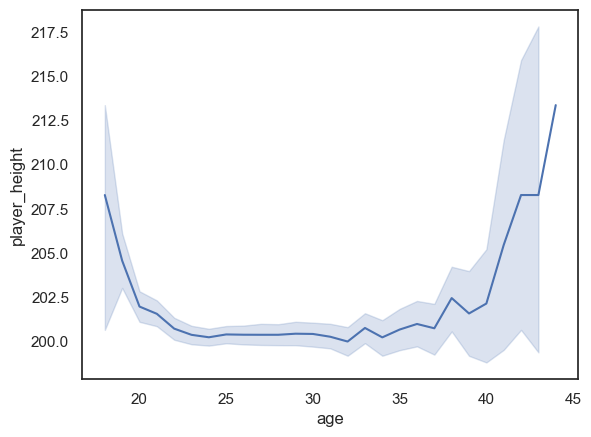

In [43]:
sns.lineplot(data=df,x='age',y='player_height')

In [44]:
df.team_abbreviation.unique()

array(['HOU', 'WAS', 'VAN', 'LAL', 'DEN', 'ORL', 'CHH', 'MIL', 'DET',
       'POR', 'DAL', 'UTA', 'SEA', 'BOS', 'IND', 'SAS', 'MIA', 'ATL',
       'NJN', 'LAC', 'GSW', 'PHI', 'NYK', 'TOR', 'PHX', 'MIN', 'CHI',
       'SAC', 'CLE', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype=object)

In [45]:
df.season.unique()

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23'], dtype=object)

In [46]:
27*82


2214